In [1]:
import os
import gc
import time
import warnings

import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from tqdm import tqdm

In [2]:
path_datasets_dir = r"/mnt/d/SPIRE-SR-AI/data/processed/dummy_set"
path_sides = os.path.join(path_datasets_dir, "SIDES_1/Test")
path_shark = os.path.join(path_datasets_dir, "SHARK_1/Test")
# path_spritz = os.path.join(path_datasets_dir, "SPRITZ/Test")
path_obs = r"/mnt/g/data/PhD Projects/SR/cosmos/cosmos_spitzer_spire_scuba/Test"

In [3]:
sim_ID = 10
obs_ID = 27

In [4]:
sim_classes = ["24", "250", "350", "500", "500SR"]
obs_classes = ["24", "250", "350", "500", "450"]
datasets = ["SIDES", "SHARK", "COSMOS"]
sim_paths = [path_sides, path_shark] #[path_sides, path_spritz, path_shark]
sim_data = [[fits.open(os.path.join(path, f"{cl}/{cl}_{sim_ID}.fits"), memmap=False)[0].data for cl in sim_classes] for path in sim_paths]
obs_data = [[fits.open(os.path.join(path_obs, f"{cl}/{cl}_{obs_ID}.fits"), memmap=False)[0].data for cl in obs_classes]]

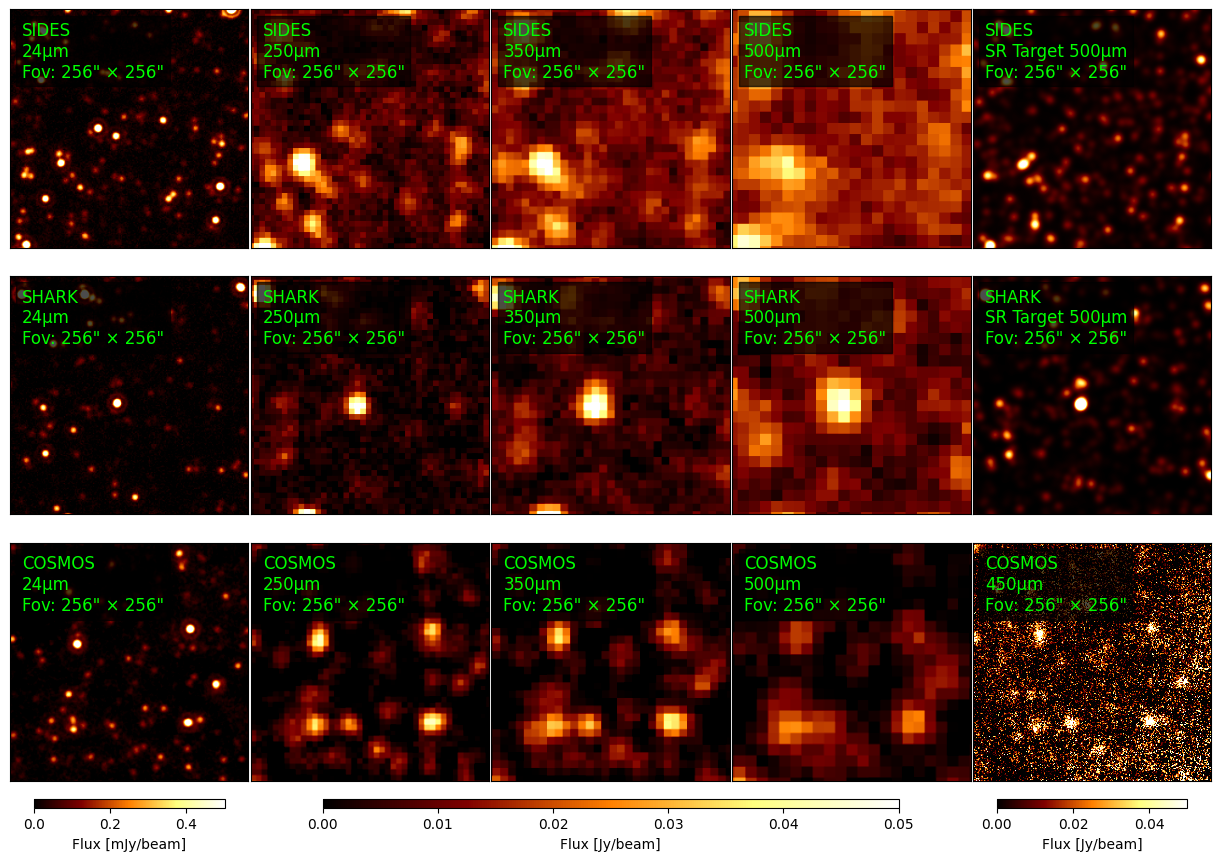

In [5]:
def plot_images(dataset_labels, data_list, bands=['24μm', '250μm', '350μm', '500μm', 'SR Target 500μm']):
    ncols = 5
    nrows = len(data_list)
    # Create a grid specification with extra rows for the colorbars
    fig = plt.figure(figsize=(ncols*3 + 0.5, nrows*3 + 1 + 0.5))
    gs = gridspec.GridSpec(nrows + 1, ncols, height_ratios=[3]*nrows + [0.1])
    axes = []
    for i in range(nrows):
        row_axes = []
        for j in range(ncols):
            ax = fig.add_subplot(gs[i, j])
            row_axes.append(ax)
        axes.append(row_axes)
    
    for row, axs in enumerate(axes):
        for col, ax in enumerate(axs):
            label = dataset_labels[row]
            band = "450μm" if (row == nrows-1) and (col == 4) else bands[col]
            if col == 0:
                ax.imshow(data_list[row][col]*1000, cmap='afmhot', vmin=0, vmax=0.5)
            elif col == 4:
                ax.imshow(data_list[row][col], cmap='afmhot', vmin=0, vmax=10e-3)
            else:
                ax.imshow(data_list[row][col], cmap='afmhot', vmin=0, vmax=50e-3)
            ax.text(0.05, 0.95, f'{label}\n{band}\nFov: 256" × 256"', color='#00FF00', fontsize=12, ha='left', va='top', 
                    transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))
            ax.tick_params(top=False,
                        bottom=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)

            for spine in ax.spines.values():
                spine.set_edgecolor("black")
    
    fig.subplots_adjust(wspace=0.01, hspace=0.04)

    # Adding colorbars in the last row of gridspec
    cbar_axes = [fig.add_subplot(gs[-1, 0]), fig.add_subplot(gs[-1, 1:4]), fig.add_subplot(gs[-1, 4])]


    # Modify the width of the colorbar axes
    for cax in cbar_axes:
        pos = cax.get_position()

        cax.set_position([pos.x0+pos.width * 0.1, pos.y0, pos.width * 0.8, pos.height])  # Adjust width by multiplying pos.width

    cbar_24 = fig.colorbar(axes[-1][0].images[0], cax=cbar_axes[0], orientation='horizontal', aspect=10)
    cbar_24.set_label('Flux [mJy/beam]')
    
    cbar_250_350_500 = fig.colorbar(axes[-1][1].images[0], cax=cbar_axes[1], orientation='horizontal', aspect=10)
    cbar_250_350_500.set_label('Flux [Jy/beam]')
    
    cbar_sr_500 = fig.colorbar(axes[-1][2].images[0], cax=cbar_axes[2], orientation='horizontal', fraction=0.04)
    cbar_sr_500.set_label('Flux [Jy/beam]')

    
    plt.savefig("paper_dataset.pdf", bbox_inches='tight', dpi=300, transparent=True)
    plt.savefig("paper_dataset.png", bbox_inches='tight', dpi=300, transparent=True)
    plt.show()


plot_images(dataset_labels=datasets, data_list=sim_data + obs_data)


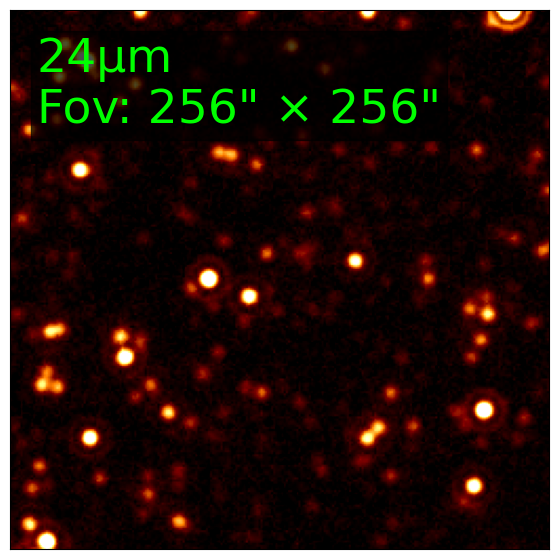

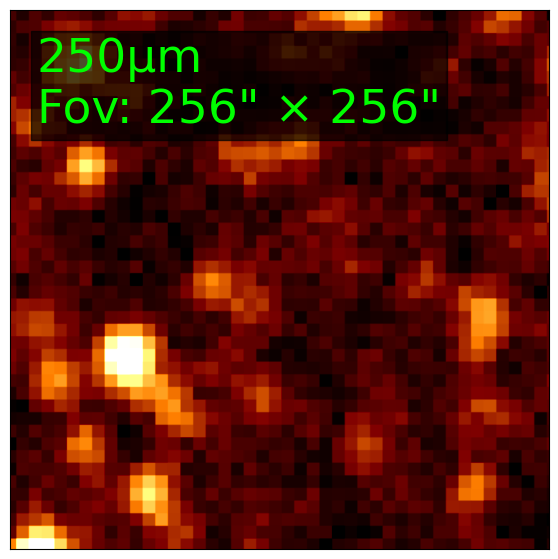

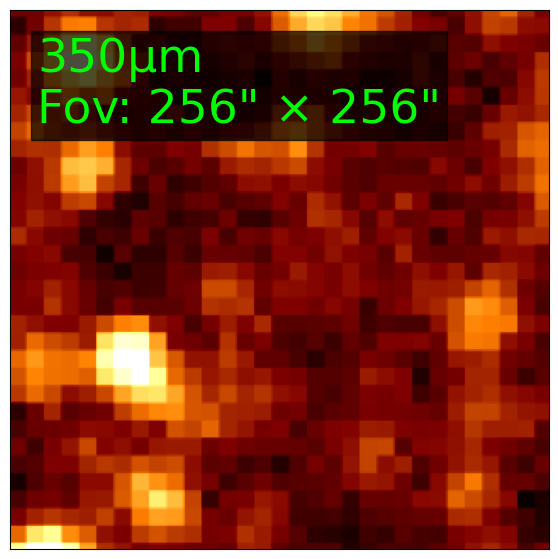

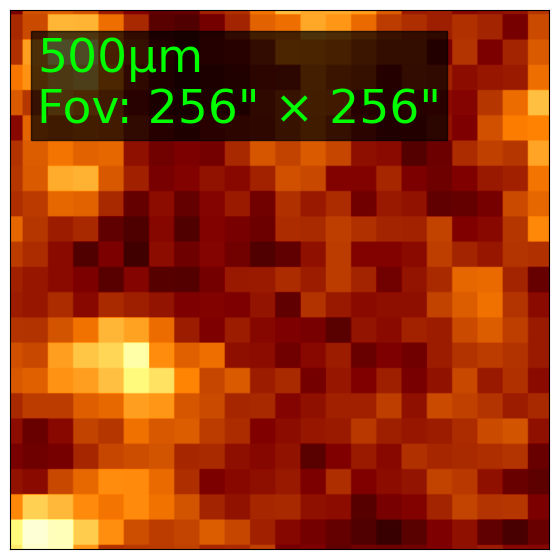

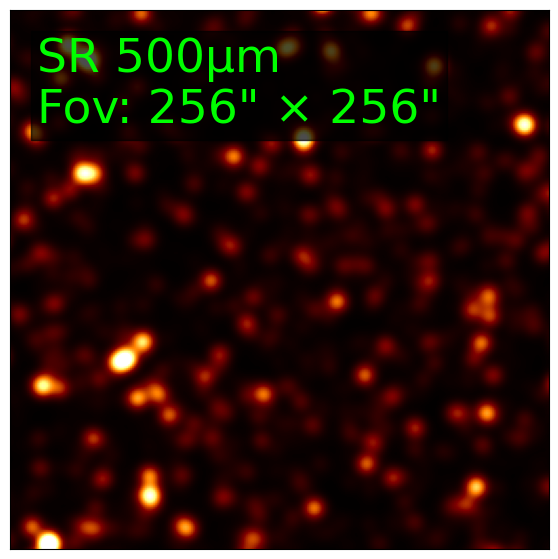

In [6]:
def plot_image(dataset_label, img, ID, band):
    # Create a grid specification with extra rows for the colorbars
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(1, 1, 1)

    if band == "24μm":
        ax.imshow(img*1000, cmap='afmhot', vmin=0, vmax=0.5)
    elif band == "SR 500μm":
        ax.imshow(img, cmap='afmhot', vmin=0, vmax=10e-3)
    else:
        ax.imshow(img, cmap='afmhot', vmin=0, vmax=50e-3)
    ax.text(0.05, 0.95, f'{band}\nFov: 256" × 256"', color='#00FF00', fontsize=34, ha='left', va='top', 
            transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))
    ax.tick_params(top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=False,
                labelbottom=False)

    for spine in ax.spines.values():
        spine.set_edgecolor("black")

    plt.savefig(f"sample_{ID}_{dataset_label}_{band}.png", bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

bands=['24μm', '250μm', '350μm', '500μm', 'SR 500μm']
for i, band in enumerate(bands):
    plot_image(dataset_label=datasets[0], img=sim_data[0][i], ID=sim_ID, band=band)
